In [1]:
# Download chest X-Ray dataset here: https://www.kaggle.com/datasets/nih-chest-xrays/sample/versions/2
# Dataset contains 5606 images with either "No Findings", i.e., healthy/control, and 
# other labels indicating presence of some disease

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil

from sklearn.model_selection import train_test_split

# Initialize rng
rng = np.random.default_rng(2022)

C:\Users\geoff\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install numpy==1.23.0

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\geoff\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [10]:
data_dir = r'C:\Users\geoff\OneDrive\COMP 647 Deep Learning\hw2\archive\sample\images'
data_details_fr = pd.read_csv(os.path.join('archive/',
                                           'sample_labels.csv'),
                              header=None)

In [11]:
data_details_fr.head()

,0,1,2,3,4,5,6,7,8,9,10
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [12]:
# Get list of file names
filenames_list = data_details_fr[0].to_list()

In [13]:
# Create list of classes
# Class 0: No Finding; Class 1: All Diseases
data_details_fr['Class'] = 1
data_details_fr.loc[data_details_fr[1] == 'No Finding', 'Class'] = 0

In [14]:
data_details_fr.head()

,0,1,2,3,4,5,6,7,8,9,10,Class
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,1
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,1
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,0
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,1
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,1


In [15]:
# Get list of classes
y_list = data_details_fr['Class'].to_list()

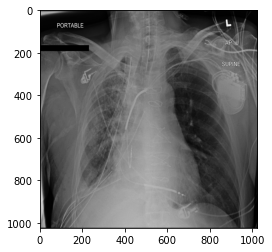

In [16]:
# Load and display sample image
im = plt.imread(os.path.join(data_dir, filenames_list[0]))
plt.imshow(im, cmap='gray')

In [17]:
# Train:val:test = 70:15:15
X_train, X_valtest, y_train, y_valtest = train_test_split(filenames_list,
                                                    y_list,
                                                    stratify=y_list,
                                                    test_size=0.3,
                                                    random_state=rng.integers(500000))

X_val, X_test, y_val, y_test = train_test_split(X_valtest,
                                                y_valtest,
                                                stratify=y_valtest,
                                                test_size=0.5,
                                                random_state=rng.integers(500000))

# Create dict to indicate type of data split
split_dict = {'train': zip(X_train, y_train),
              'val': zip(X_val, y_val),
              'test': zip(X_test, y_test)}

In [18]:
for split_type in ['train', 'val', 'test']:
    for className in ['0', '1']:
        os.makedirs(os.path.join('split_archive', split_type, className))

In [19]:
# Copy files from archive to appropriate folder

for split_type in ['train', 'val', 'test']:
    for filename, y in split_dict[split_type]:
        src = os.path.join(data_dir, filename)
        dst = os.path.join('split_archive', split_type, str(y), filename)
        shutil.copyfile(src, dst)